<a href="https://colab.research.google.com/github/matsunagalab/md_analysis/blob/main/md_distancemap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mdtraj

  Using cached mdtraj-1.9.7.tar.gz (2.1 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mdtraj: filename=mdtraj-1.9.7-cp310-cp310-linux_x86_64.whl size=7958353 sha256=3ef620bb8048b0ab097f38d119a2b6d4fd5a4399ec29809f21b11a8111a56bfc
  Stored in directory: /root/.cache/pip/wheels/ad/55/84/3b6abc1f4021160d8b6b876a9ed69148344f57bc443c1d2dd3
Successfully built mdtraj


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


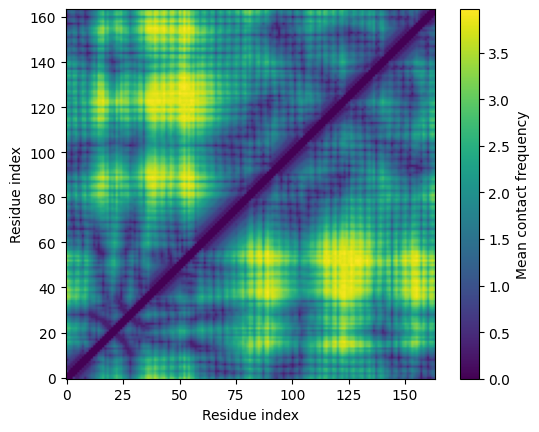

In [ ]:
import matplotlib.pyplot as plt
import mdtraj as md
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your files on your Google Drive
path = '/content/drive/MyDrive/data/lysozyme_wildtype/'
#path = '/content/drive/MyDrive/data/lysozyme_mutant/'

# Load the trajectory
traj = md.load(path + 'prot.dcd', top = path + 'prot.pdb')

# Calculate the contact distances for each frame
distances, residue_pairs = md.compute_contacts(traj, scheme='closest-heavy')

# Average over all frames to get the mean contact map
mean_distances = distances.mean(axis=0)

# Create an empty 2D array for the contact map
distance_map = np.zeros((traj.topology.n_residues, traj.topology.n_residues))

# Fill the contact map with the mean contacts
for (i, j), distance in zip(residue_pairs, mean_distances):
    distance_map[i, j] = distance
    distance_map[j, i] = distance

# Plot the contact map
plt.imshow(distance_map, cmap='viridis', origin='lower')
plt.colorbar(label='Mean contact frequency')
plt.xlabel('Residue index')
plt.ylabel('Residue index')
plt.show()

